In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from desitarget.targetmask import desi_mask, bgs_mask


In [2]:
data_fba = Table.read("/global/cscratch1/sd/dsporta/results_mock_alex/multirun/fba_summary_bright_south_t15.fits")
data_obs = Table.read("/global/cscratch1/sd/dsporta/results_mock_alex/multirun/summary_all_bright_south_15.fits")

In [3]:
data_fba[:10]

TARGETID,RA,DEC,DESI_TARGET,BGS_TARGET,MWS_TARGET,AVAIL,NUMOBS,SUBPRIORITY,PRIORITY_INIT,NUMOBS_INIT
int64,float64,float64,int64,int64,int64,bool,int64,float64,int64,int64
288230376151711744,44.815284729003906,0.4066418409347534,1152921504606846976,9,0,True,1,0.6366701931482618,2100,1
288230376151711745,44.88201141357422,0.19175498187541962,1152921504606846976,1,0,True,0,0.395442992933976,2000,1
288230376151711746,45.017723083496094,0.3858080208301544,1152921504606846976,2,0,True,1,0.9206101013823692,2100,1
288230376151711747,44.84988021850586,0.4202732443809509,1152921504606846976,2,0,True,1,0.6862292563391063,2100,1
288230376151711748,44.819236755371094,0.30350926518440247,1152921504606846976,2,0,True,1,0.9512854453628269,2100,1
288230376151711749,44.752201080322266,0.24477235972881317,1152921504606846976,1,0,True,0,0.23219483455098833,2000,1
288230376151711750,44.956851959228516,0.15488387644290924,1152921504606846976,2,0,True,1,0.7303089295849143,2100,1
288230376151711751,45.12470245361328,0.1477052867412567,1152921504606846976,2,0,True,1,0.8752982735026722,2100,1
288230376151711752,44.89381408691406,0.29330238699913025,1152921504606846976,2,0,True,1,0.9079869925606068,2100,1


In [4]:
data_obs[:10]

TARGETID,NUMOBS_0,NUMOBS_1,NUMOBS_2,NUMOBS_3,NUMOBS_4,NUMOBS_5,NUMOBS_6,NUMOBS_7,NUMOBS_8,NUMOBS_9,NUMOBS_10,NUMOBS_11,NUMOBS_12,NUMOBS_13,NUMOBS_14,TILE_ID0,TILE_ID1,TILE_ID2,TILE_ID3,TILE_ID4,TILE_ID5,TILE_ID6
int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
288230376151711744,1,1,0,1,1,1,1,0,1,1,1,0,1,0,1,33103,38865,44627,-1,-1,-1,-1
288230376151711745,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33103,-1,-1,-1,-1,-1,-1
288230376151711746,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,38865,44627,-1,-1,-1,-1,-1
288230376151711747,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,33103,38865,44627,-1,-1,-1,-1
288230376151711748,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,44627,-1,-1,-1,-1,-1,-1
288230376151711749,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,33103,38865,44627,-1,-1,-1,-1
288230376151711750,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,33103,38865,44627,-1,-1,-1,-1
288230376151711751,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,33103,38865,44627,-1,-1,-1,-1
288230376151711752,1,0,1,1,1,1,0,0,1,1,1,1,0,0,1,33103,38865,44627,-1,-1,-1,-1


In [5]:
data_obs.keys()

['TARGETID',
 'NUMOBS_0',
 'NUMOBS_1',
 'NUMOBS_2',
 'NUMOBS_3',
 'NUMOBS_4',
 'NUMOBS_5',
 'NUMOBS_6',
 'NUMOBS_7',
 'NUMOBS_8',
 'NUMOBS_9',
 'NUMOBS_10',
 'NUMOBS_11',
 'NUMOBS_12',
 'NUMOBS_13',
 'NUMOBS_14',
 'TILE_ID0',
 'TILE_ID1',
 'TILE_ID2',
 'TILE_ID3',
 'TILE_ID4',
 'TILE_ID5',
 'TILE_ID6']

In [6]:
total_num_obs = np.zeros_like(data_obs['TARGETID'])
for i in range(15):
    total_num_obs += data_obs['NUMOBS_'+str(i)]

In [12]:
is_available = data_fba['AVAIL']==True
is_bright = (data_fba['BGS_TARGET']&bgs_mask['BGS_BRIGHT'])!=0
is_faint = (data_fba['BGS_TARGET']&bgs_mask['BGS_FAINT'])!=0


In [8]:
bgs_mask.names

<bound method BitMask.names of bgs_mask:
  - [BGS_FAINT,        0, "BGS faint targets", {'obsconditions': 'BRIGHT|GRAY|DARK', 'priorities': {'UNOBS': 2000, 'MORE_ZWARN': 2, 'MORE_ZGOOD': 1000, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0}, 'numobs': 1}]
  - [BGS_BRIGHT,       1, "BGS bright targets", {'obsconditions': 'BRIGHT', 'priorities': {'UNOBS': 2100, 'MORE_ZWARN': 2, 'MORE_ZGOOD': 1000, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0}, 'numobs': 1}]
  - [BGS_WISE,         2, "BGS wise targets", {'obsconditions': 'BRIGHT', 'priorities': {'UNOBS': 2000, 'MORE_ZWARN': 2, 'MORE_ZGOOD': 1000, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0}, 'numobs': 1}]
  - [BGS_FAINT_HIP,    3, "BGS faint targets at bright priorty", {'obsconditions': 'BRIGHT', 'priorities': {'UNOBS': 2100, 'MORE_ZWARN': 2, 'MORE_ZGOOD': 1000, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0}, 'numobs': 1}]
  - [BGS_FAINT_NORTH,  8, "BGS faint cuts tuned for Bok/Mosaic", {'obsconditions': 'BRIGHT|GRAY|DARK', 'priorities': {'UNOBS': 0, 'MORE_ZWARN':

(array([7.543159e+06, 6.593110e+05, 6.039660e+05, 5.606390e+05,
        5.194840e+05, 4.851270e+05, 4.561780e+05, 4.336330e+05,
        4.132650e+05, 3.946080e+05, 3.803270e+05, 3.751980e+05,
        3.802930e+05, 3.966420e+05, 4.335500e+05, 5.038589e+06,
        8.073000e+03, 5.692000e+03, 4.654000e+03, 3.835000e+03,
        3.501000e+03, 3.064000e+03, 2.919000e+03, 2.549000e+03,
        2.254000e+03, 1.870000e+03, 1.624000e+03, 1.468000e+03,
        1.357000e+03, 9.621000e+03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <a list of 30 Patch objects>)

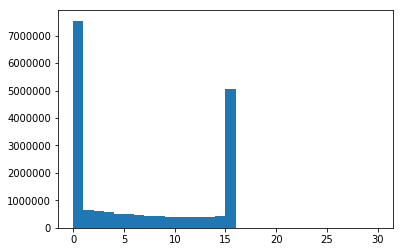

In [9]:
plt.hist(total_num_obs[is_available], np.linspace(0,30,31))

In [13]:
n_avail = len(total_num_obs[is_available&is_faint])
n_avail_and_observed = np.count_nonzero(total_num_obs[is_available&is_faint]!=0)
n_avail_always_observed = np.count_nonzero(total_num_obs[is_available&is_faint]==15)
n_avail_never_observed = np.count_nonzero(total_num_obs[is_available&is_faint]==0)
print(n_avail_and_observed/n_avail, n_avail_never_observed/n_avail,  n_avail_always_observed/n_avail)

0.8972273829756815 0.10277261702431847 0.5272945922077792


In [14]:
n_avail = len(total_num_obs[is_available&is_bright])
n_avail_and_observed = np.count_nonzero(total_num_obs[is_available&is_bright]!=0)
n_avail_always_observed = np.count_nonzero(total_num_obs[is_available&is_bright]==15)
n_avail_never_observed = np.count_nonzero(total_num_obs[is_available&is_bright]==0)
print(n_avail_never_observed, n_avail)
print(n_avail_and_observed/n_avail, n_avail_never_observed/n_avail,  n_avail_always_observed/n_avail)

4377 3489973
0.9987458355695016 0.0012541644304984595 0.710698048380317


0.6057545246201711 0.3942454753798289 0.2633433705359488


In [26]:
missed_qsos = (data['NAVAIL_FIBER']!=0) & (data['isQSO']) & (data['NUMOBS']==0)
print('{} QSOs in total'.format(np.count_nonzero(data['isQSO'])))
print('{} QSOs were missed'.format(np.count_nonzero(missed_qsos)))

226467 QSOs in total
4051 QSOs were missed


Text(0.5,1,'Spatial distribution of missed QSOs')

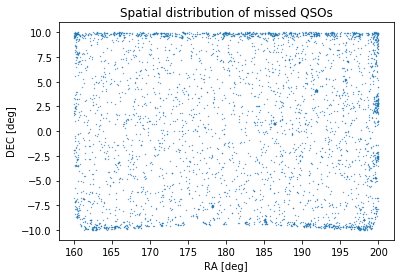

In [27]:
plt.scatter(data['RA'][missed_qsos], data['DEC'][missed_qsos], s=0.1)
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.title('Spatial distribution of missed QSOs')

4.225332387715345
2.531226857566033


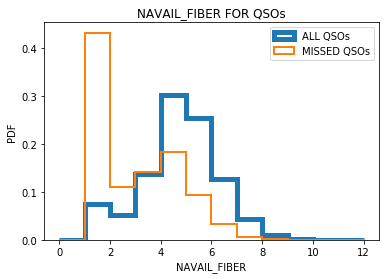

In [28]:
plt.hist(data['NAVAIL_FIBER'][data['isQSO']&(data['NAVAIL_FIBER']>0)], 
         bins=np.linspace(0,12,13),normed=True,histtype='step', linewidth=5, label='ALL QSOs')
plt.hist(data['NAVAIL_FIBER'][missed_qsos], 
         bins=np.linspace(0,12,13),normed=True, histtype='step', linewidth=2, label='MISSED QSOs')
plt.xlabel("NAVAIL_FIBER")
plt.ylabel("PDF")
plt.title("NAVAIL_FIBER FOR QSOs")
plt.legend()
print(np.mean(data['NAVAIL_FIBER'][data['isQSO']&(data['NAVAIL_FIBER']>0)]))
print(np.mean(data['NAVAIL_FIBER'][missed_qsos]))

4.156800248938676
2.494327390599676


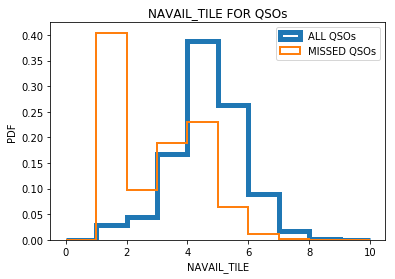

In [13]:
plt.hist(data['NAVAIL_TILE'][data['isQSO']&(data['NAVAIL_TILE']>0)], 
         bins=np.linspace(0,10,11),normed=True,histtype='step', linewidth=5, label='ALL QSOs')
plt.hist(data['NAVAIL_TILE'][missed_qsos], 
         bins=np.linspace(0,10,11),normed=True, histtype='step', linewidth=2, label='MISSED QSOs')
plt.xlabel("NAVAIL_TILE")
plt.ylabel("PDF")
plt.title("NAVAIL_TILE FOR QSOs")
plt.legend()
print(np.mean(data['NAVAIL_TILE'][data['isQSO']&(data['NAVAIL_TILE']>0)]))
print(np.mean(data['NAVAIL_TILE'][missed_qsos]))